# Assess Intervention Efficacy

## Step 7 - Define Active Users


### 1) Explore Activity across Engagement Groups

In [1]:
* --------------------------------------------------------
* Import Data
* --------------------------------------------------------
qui do Folders 
qui cd "$Derived" 

use COPE_Clusters, clear
merge 1:1 ID using COPE_Final_Indicators, nogen // N=203 not matched are controls

(Written by R.              )

    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                               204  
    -----------------------------------------


In [2]:
%head

,ID,KMeans,KMeans_Cluster,KMeans_Neighbour,KMeans_SS,cohort,registered,activated,totalmins,logindays,loginwks,pageviews,posts,ptp,ate,totaldays,act_wkpv,dur_wkpv,act_ptp,dur_ptp,act_ate,dur_ate,sdwkpv,sdptp,sdate,rate_wkpv,rate_ptp,rate_ate
1,1,2,2,3,.6089755,1,1,1,3,1,1,1,0,0,0,18,1,1,0,0,0,0,.23570226,0,0,1,0,0
2,4,.,.,.,.,6,1,1,176.91667,.,6,206,2,0,2,93,6,10,0,0,2,2,22.708439,0,.32338083,.6,0,1
3,8,2,2,3,.5997149,2,1,1,4.95,1,1,4,0,0,0,10,1,1,0,0,0,0,.94280905,0,0,1,0,0
4,11,1,1,2,.1304764,3,1,1,243.75,24,12,403,5,0,5,94,12,14,0,0,3,11,37.23872,0,.66911316,.8571429,0,.2727273
5,13,.,.,.,.,6,1,1,44.783333,.,2,308,0,0,0,21,3,3,0,0,0,0,41.356255,0,0,1,0,0


An example of plots to assess activity across different indicator variables. 

(174 real changes made)
(112 real changes made)
(174 real changes made)
(33 real changes made)
(174 real changes made)
(0 real changes made)


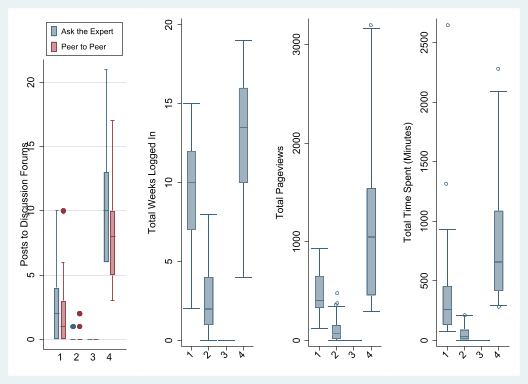

graph __000004 not found
r(111);


In [3]:
#delimit ;
	graph box ate ptp
	, 
	name(posts, replace)
	over(KMeans) plotr(style(none)) scheme(s1color)
	box(1 , color(edkblue )) box(2, color(maroon ))
	marker(1 , mcolor(edkblue)) marker(2, mcolor(maroon))
	ytitle("Posts to Discussion Forums", m(r+2)) 
	legend(order(1 "Ask the Expert" 2 "Peer to Peer") symx(*0.3) ring(1) pos(11) row(2) size(small) region(margin(r+10)))
	nodraw
;
#delimit cr 

* Defining Short Labels for Graph
lab var loginwks "Total Weeks Logged In"
lab var pageviews "Total Pageviews"
lab var totalmin "Total Time Spent (Minutes)"

* In a loop generate a box plot for 3 variables above
foreach v in loginwks pageviews totalmin {
	* By each cluster group (named ord) - generated parameters for boxplot
	bysort KMeans: egen mid = median(`v')
	bysort KMeans: egen p25 = pctile(`v') , p(25)
	bysort KMeans: egen p75 = pctile(`v') , p(75)
	bysort KMeans: egen max = max(`v')
	bysort KMeans: egen min = min(`v')
	bysort KMeans: gen lw = p25 - ((p75 - p25) * 1.5)
	replace lw = min if lw < min
	bysort KMeans: gen uw = p75 + ((p75 - p25) * 1.5)
	replace uw = max if uw> max
	gen outside = (`v' > uw | `v' < lw)

	local vlab : variable label `v' // take the variable label on y-axis of graph

	* Plot boxplot
	#delimit ;
	graph twoway 
		(rcap lw uw KMeans , lcolor(edkblue) msize(vhuge))
		(rbar p25 mid KMeans, barw(.5) fcolor(edkblue) fintensity(inten50) lcolor(edkblue))
		(rbar mid p75 KMeans, barw(.5) fcolor(edkblue) fintensity(inten50) lcolor(edkblue))
		(scatter `v' KMeans if outside, jitter(0.5) mcolor(edkblue) mfcolor(none) msize(small) mlwidth(medthin))
		,
		ytitle("`vlab'", m(r+2)) 
		xtitle("")
		xlabel( , valuelabel angle(45))
		legend(off) 
		plotr(style(none))
		scheme(s1color)
		name(`v', replace)
		nodraw // Don't draw, display in combine command below
	;
	#delimit cr

	drop mid p25 p75 max min lw uw outside
}

* Combine and Display
graph combine posts loginwks pageviews totalmin, r(1)

Assessing these groups across engagement indicator variables identified the labels:
- Non-Engagers
- Low-Engagers
- Mid-Engagers
- High-Engagers

These labels were then applied to the data.

In [4]:
* ---- Order cluster variables as monotonic trend 
gen ord = .
replace ord = 1 if KMeans == 3
replace ord = 2 if KMeans == 2
replace ord = 3 if KMeans == 1
replace ord = 4 if KMeans == 4

* ---- Label Clusters (useful when visualising groups)
* ---- These Label Names are defined AFTER exploring and visualising the data. 
lab define clust_ord 1 "Non-Engagers" 2 "Low Engagers" 3 "Mid Engagers" 4 "High Engagers"
lab values ord clust_ord

(204 missing values generated)
(30 real changes made)
(69 real changes made)
(33 real changes made)
(10 real changes made)


#### Boxplot of Indicator Variables
Before defining the active user definitions to use in the efficacy analysis, it's first important to visually assess the groups in order to establish how best to generate the definitions. Box plots will help visualise differences in activities between the group and also assess whether there is a trend in activity across the indicator variables. 

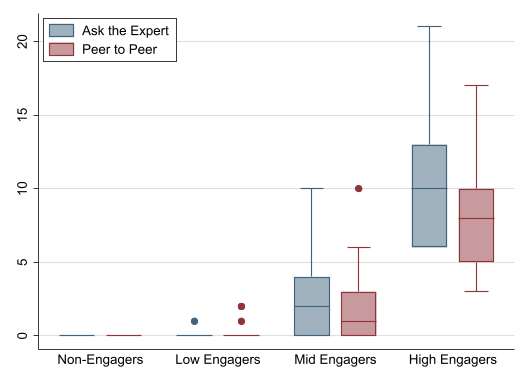

In [5]:
* --------------------------------------------------------
* Boxplots of Indicators
* --------------------------------------------------------

* --- ATE & PTP Posting
#delimit ;
	graph box ate ptp
	, over(ord) plotr(style(none)) scheme(s1color)
	box(1 , color(edkblue )) box(2, color(maroon ))
	marker(1 , mcolor(edkblue)) marker(2, mcolor(maroon))
	legend(order(1 "Ask the Expert" 2 "Peer to Peer") symx(*0.5) ring(0) pos(11) row(2))
;
#delimit cr 

(174 real changes made)
(112 real changes made)
(174 real changes made)
(33 real changes made)
(174 real changes made)
(0 real changes made)


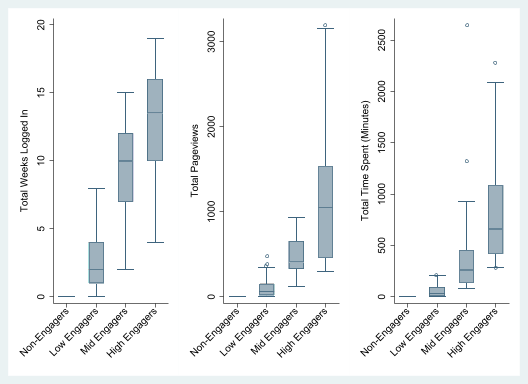

In [6]:
* --------------------------------------------------------
* --- Function to Generate Custom Boxplots 
* --------------------------------------------------------

* Defining Short Labels for Graph
lab var loginwks "Total Weeks Logged In"
lab var pageviews "Total Pageviews"
lab var totalmin "Total Time Spent (Minutes)"

* In a loop generate a box plot for 3 variables above
foreach v in loginwks pageviews totalmin {
	* By each cluster group (named ord) - generated parameters for boxplot
	bysort ord: egen mid = median(`v')
	bysort ord: egen p25 = pctile(`v') , p(25)
	bysort ord: egen p75 = pctile(`v') , p(75)
	bysort ord: egen max = max(`v')
	bysort ord: egen min = min(`v')
	bysort ord: gen lw = p25 - ((p75 - p25) * 1.5)
	replace lw = min if lw < min
	bysort ord: gen uw = p75 + ((p75 - p25) * 1.5)
	replace uw = max if uw> max
	gen outside = (`v' > uw | `v' < lw)

	local vlab : variable label `v' // take the variable label on y-axis of graph

	* Plot boxplot
	#delimit ;
	graph twoway 
		(rcap lw uw ord , lcolor(edkblue) msize(vhuge))
		(rbar p25 mid ord, barw(.5) fcolor(edkblue) fintensity(inten50) lcolor(edkblue))
		(rbar mid p75 ord, barw(.5) fcolor(edkblue) fintensity(inten50) lcolor(edkblue))
		(scatter `v' ord if outside, jitter(0.5) mcolor(edkblue) mfcolor(none) msize(small) mlwidth(medthin))
		,
		ytitle("`vlab'", m(r+2)) 
		xtitle("")
		xlabel( , valuelabel angle(45))
		legend(off) 
		plotr(style(none))
		scheme(s1color)
		name(`v', replace)
		nodraw // Don't draw, display in combine command below
	;
	#delimit cr

	drop mid p25 p75 max min lw uw outside
}

* Combine and Display
graph combine loginwks pageviews totalmin, r(1)

#### Intervention Retention
As with `step 1` where the intervention retention was explored between whether a participant posted to forums or not. The intervention retention for each participant can also be assessed across the identified cluster groups to further assess how activity of participants between groups differs.  

** Note - Because one of the groups was the "non-engagers" they don't appear in the plot below so only 3 of the 4 groups are shown. 

(1 missing value generated)
(20 real changes made)

Survival-time data settings

           ID variable: ID
         Failure event: event==1
Observed time interval: (totaldays[_n-1], totaldays]
     Exit on or before: failure

--------------------------------------------------------------------------
        204  total observations
          1  event time missing (totaldays>=.)              PROBABLE ERROR
         32  observations end on or before enter()
--------------------------------------------------------------------------
        171  observations remaining, representing
        171  subjects
        151  failures in single-failure-per-subject data
     11,666  total analysis time at risk and under observation
                                                At risk from t =         0
                                     Earliest observed entry t =         0
                                          Last observed exit t =       126

        Failure _d: event==1
  Analysis time _t

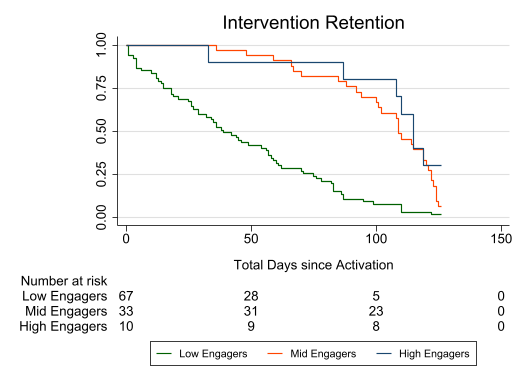

In [7]:
gen event = 1 if totaldays < . // every row is an event
replace event = 2 if totaldays >= 126 & totaldays < . 
stset totaldays , id(ID) f(event==1)

stsum , by(ord)

#delimit ; 
	sts graph , 
	by(ord) risktable plotr(style(none)) scheme(s1color) 
	title("Intervention Retention") 
	xtitle("Total Days since Activation" , m(t+3)) 
	risktable( , order(1 "Low Engagers" 2 "Mid Engagers" 3 "High Engagers"))
	legend(order(1 "Low Engagers" 2 "Mid Engagers" 3 "High Engagers") 
			symx(*0.3) row(1) size(*0.8))
;
#delimit cr

### 2) Active User Definitions
The exploration of activity across different engagement indicator variables indicates there is a linear trend between the identified groups. The most appropriate set of active user defintions will the ones with a threshold approach. With 4 groups there are 3 positions where a binary threshold can be applied (i.e the first is between the non-engagers and the low-engagers and so on). Additionally, instead of a binary definition, this could also be a categorical definition for estimand analyses that allows intercurrent events to be categorical. 

These definitions are generated below. 

In [8]:
* --------------------------------------------------------
* Compliance Definitions
* --------------------------------------------------------

* ---- Binary Compliance - Optimal 

forvalues i = 1/3 {
	gen ocomp`i'= (ord > `i') if ord < .  
}

* ---- Ordered Compliance
gen scomp = ord

* ------------------------------------------------------
* Labels
* ------------------------------------------------------

lab var ocomp1 ">1 Binary Compliance - Optimal Grouping"
lab var ocomp2 ">2 Binary Compliance - Optimal Grouping"
lab var ocomp3 ">3 Binary Compliance - Optimal Grouping"

lab var scomp "Ordered Compliance - Optimal Grouping"

(62 missing values generated)
(62 missing values generated)
(62 missing values generated)
(62 missing values generated)


In [9]:
* --------------------------------------------------------
* Tabulate in COPe-Support Arm to visualise
* --------------------------------------------------------

foreach v in ocomp1 ocomp2 ocomp3 scomp {
    local vlab : variable label `v'
    di ""
    di "Active User Definition for `vlab' "
    tab ord `v'
}


Active User Definition for >1 Binary Compliance - Optimal Grouping 

              | >1 Binary Compliance
              |  - Optimal Grouping
          ord |         0          1 |     Total
--------------+----------------------+----------
 Non-Engagers |        30          0 |        30 
 Low Engagers |         0         69 |        69 
 Mid Engagers |         0         33 |        33 
High Engagers |         0         10 |        10 
--------------+----------------------+----------
        Total |        30        112 |       142 

Active User Definition for >2 Binary Compliance - Optimal Grouping 

              | >2 Binary Compliance
              |  - Optimal Grouping
          ord |         0          1 |     Total
--------------+----------------------+----------
 Non-Engagers |        30          0 |        30 
 Low Engagers |        69          0 |        69 
 Mid Engagers |         0         33 |        33 
High Engagers |         0         10 |        10 
--------------+----